(1000,) (1000, 1000)
(250,) (250,)


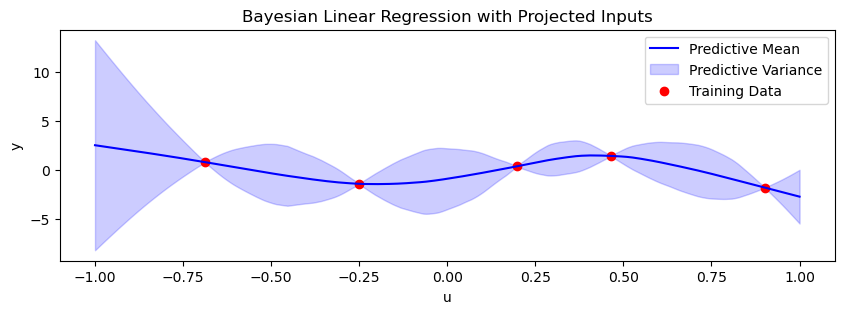

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Number of dimensions for the (hidden) feature layer
Nhid = 1000

# Generate a small set of training data
n_train = 5
u_train = np.random.uniform(-1, 1, n_train)
y_train = np.random.uniform(-2, 2, n_train)

# Small random weights and biases for the projection into higher dimensions
W_hidden = np.random.normal(0, 1, (Nhid, 1)) 
b_hidden = np.random.normal(0, 1, Nhid)

# Define the non-linear function
def nonlinearity(a):
    # sigmoid
    #return 1.0/(1.0 + np.exp(-a))
    # sinusoid!!
    #return np.sin(a) 
    # relu
    return np.maximum(0, a)

# Project u_train into higher dimensions
x_train = nonlinearity(W_hidden @ u_train.reshape(1, -1) + b_hidden.reshape(-1, 1)).T

# Prior variance
sigma2_prior = 5.0
# Observation noise variance
sigma2_noise = 0.001

# Test set of u values, for making the "continuous looking" plot
Ntests = 250
u_test = np.linspace(-1, 1, Ntests)
# Project u_test into higher dimensions
x_test = nonlinearity(W_hidden @ u_test.reshape(1, -1) + b_hidden.reshape(-1, 1)).T

# DEFAULT VALUES
W_map = np.zeros(Nhid)
Sigma_w = sigma2_prior * np.eye(Nhid)
print(W_map.shape, Sigma_w.shape) 
y_pred = np.zeros(Ntests)
sigma2_pred = np.ones(Ntests)
print(y_pred.shape, sigma2_pred.shape)


##-------------------------------------------------------------------------
## TODO

# Compute the MAP estimate of the weights, W_map
X = x_train
y = y_train

A = (1 / sigma2_noise) * (X.T @ X) + (1 / sigma2_prior) * np.eye(Nhid)
B = (1 / sigma2_noise) * X.T @ y
W_map = np.linalg.solve(A, B)

# Posterior covariance of W, Sigma_w
Sigma_w = np.linalg.inv(A)

# Predictive means, y_pred
X_test = x_test
y_pred = X_test @ W_map

# Predictive variances, sigma2_pred
sigma2_pred = sigma2_noise + np.sum(X_test @ Sigma_w * X_test, axis=1)


    
##-------------------------------------------------------------------------
# Plotting
plt.figure(figsize=(10, 3))
# Mean prediction
plt.plot(u_test, y_pred, label='Predictive Mean', color='blue')
# Confidence interval (2 standard deviations for 95% confidence)
y_pred_upper = y_pred + 2 * np.sqrt(sigma2_pred)
y_pred_lower = y_pred - 2 * np.sqrt(sigma2_pred)
plt.fill_between(u_test, y_pred_lower, y_pred_upper, color='blue', alpha=0.2, label='Predictive Variance')
# Plot training data points too
plt.scatter(u_train, y_train, color='red', label='Training Data')

plt.title('Bayesian Linear Regression with Projected Inputs')
plt.xlabel('u')
plt.ylabel('y')
#plt.ylim(-10,10)
plt.legend()
#plt.show()
plt.savefig('eg-Bayes-linreg.png')
